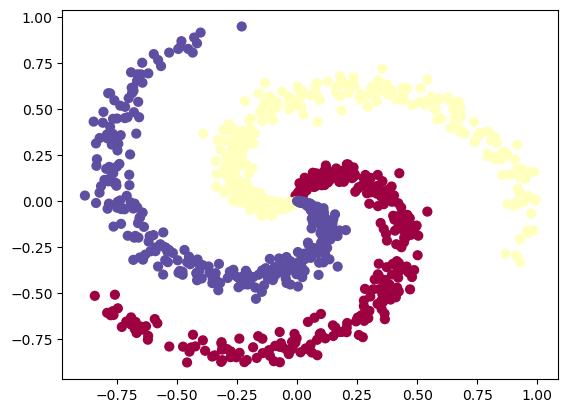

In [21]:
# Code for creating a spiral dataset from CS231n
import matplotlib.pyplot as plt
import numpy as np

N = 300 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [16]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [22]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(720, 180, 720, 180)

In [63]:
my_model = nn.Sequential(
    nn.Linear(2, 100),
    nn.BatchNorm1d(100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.BatchNorm1d(100),
    nn.ReLU(),
    nn.Linear(100, 3)
).to(device)

my_model

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=100, bias=True)
  (4): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=3, bias=True)
)

In [64]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(my_model.parameters(), 
                            lr=0.1) 

In [65]:
y_logits = my_model(X_test.to(device))
y_logits

tensor([[ 0.2320,  0.2542, -0.0248],
        [-0.6020, -0.2550,  0.0722],
        [-0.2592, -0.3809, -0.6388],
        [ 0.0615, -0.4887, -0.4155],
        [ 0.1869,  0.2123, -0.0348],
        [-0.4317, -0.0789,  0.1656],
        [-0.6500, -0.3656, -0.2196],
        [ 0.1232, -0.0227, -0.4356],
        [ 0.2519,  0.2890,  0.0136],
        [ 0.2539,  0.2775,  0.0289],
        [ 0.1548, -0.0858, -0.4259],
        [-0.0764, -0.2551,  0.0477],
        [-0.3110, -0.4520, -0.0010],
        [ 0.0624,  0.0431, -0.2062],
        [-0.3674, -0.0867,  0.1697],
        [ 0.1358, -0.6338, -0.7244],
        [ 0.0135, -0.3072, -0.5932],
        [ 0.1220,  0.2299,  0.0464],
        [ 0.1437,  0.1066,  0.0411],
        [ 0.2312,  0.2569, -0.0255],
        [-0.3289, -0.3272, -0.4758],
        [-0.3105, -0.1431,  0.0782],
        [-0.0900, -0.1058, -0.1542],
        [ 0.0947,  0.0466, -0.0048],
        [-0.0578, -0.2380,  0.1151],
        [ 0.0771,  0.0161,  0.0235],
        [ 0.1841,  0.2154, -0.0457],
 

In [66]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5577, 0.5632, 0.4938],
        [0.3539, 0.4366, 0.5180],
        [0.4355, 0.4059, 0.3455],
        [0.5154, 0.3802, 0.3976],
        [0.5466, 0.5529, 0.4913],
        [0.3937, 0.4803, 0.5413],
        [0.3430, 0.4096, 0.4453],
        [0.5308, 0.4943, 0.3928],
        [0.5627, 0.5718, 0.5034],
        [0.5631, 0.5689, 0.5072],
        [0.5386, 0.4786, 0.3951],
        [0.4809, 0.4366, 0.5119],
        [0.4229, 0.3889, 0.4997],
        [0.5156, 0.5108, 0.4486],
        [0.4092, 0.4783, 0.5423],
        [0.5339, 0.3467, 0.3264],
        [0.5034, 0.4238, 0.3559],
        [0.5305, 0.5572, 0.5116],
        [0.5359, 0.5266, 0.5103],
        [0.5575, 0.5639, 0.4936],
        [0.4185, 0.4189, 0.3832],
        [0.4230, 0.4643, 0.5195],
        [0.4775, 0.4736, 0.4615],
        [0.5236, 0.5117, 0.4988],
        [0.4855, 0.4408, 0.5288],
        [0.5193, 0.5040, 0.5059],
        [0.5459, 0.5537, 0.4886],
        [0.3459, 0.4349, 0.5166],
        [0.5037, 0.5044, 0.4459],
        [0.513

In [67]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(my_model(X_test.to(device))))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([[True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True,

tensor([[1., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.],
        [1., 0., 0.],
        [1., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.],
        [1., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 0.],
        [1., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 0.],
        [0., 0., 0.],
        [0., 0., 1.],
        [0., 0., 0.],
        [1., 1., 0.],
        [0., 0., 1.],
        [1., 1., 1.],
        [1., 1., 0.],
        [0., 0., 1.],
        [1., 1., 0.],
        [1., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 1.],
        [1., 1., 0.],
        [0., 0., 0.],
        [1., 1., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [1., 1., 1.],
        [0., 0., 1.],
        [1., 1., 0.],
        [1

In [68]:
def accuracy_fn(y_true, y_pred):
    # Nếu y_pred có nhiều hơn một chiều, lấy argmax
    if len(y_pred.shape) > 1:
        y_pred = torch.argmax(y_pred, dim=1)
    
    correct = torch.eq(y_true, y_pred).sum().item()  # Đếm số mẫu dự đoán đúng
    acc = (correct / len(y_true)) * 100  # Tính phần trăm độ chính xác
    return acc



In [69]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 500

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    my_model.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = my_model(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    my_model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = my_model(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.07082, Accuracy: 50.83% | Test loss: 1.08154, Test acc: 42.22%
Epoch: 10 | Loss: 0.48121, Accuracy: 77.08% | Test loss: 0.95495, Test acc: 55.56%
Epoch: 20 | Loss: 0.35562, Accuracy: 84.86% | Test loss: 0.75539, Test acc: 68.89%
Epoch: 30 | Loss: 0.28224, Accuracy: 86.81% | Test loss: 0.48979, Test acc: 80.56%
Epoch: 40 | Loss: 0.23532, Accuracy: 86.81% | Test loss: 0.30862, Test acc: 88.89%
Epoch: 50 | Loss: 0.20332, Accuracy: 87.08% | Test loss: 0.21840, Test acc: 90.00%
Epoch: 60 | Loss: 0.17557, Accuracy: 89.03% | Test loss: 0.17305, Test acc: 93.89%
Epoch: 70 | Loss: 0.15311, Accuracy: 91.39% | Test loss: 0.14790, Test acc: 89.44%
Epoch: 80 | Loss: 0.13373, Accuracy: 89.58% | Test loss: 0.12385, Test acc: 93.33%
Epoch: 90 | Loss: 0.11822, Accuracy: 90.42% | Test loss: 0.10931, Test acc: 93.33%
Epoch: 100 | Loss: 0.10876, Accuracy: 90.14% | Test loss: 0.09789, Test acc: 93.33%
Epoch: 110 | Loss: 0.09283, Accuracy: 89.31% | Test loss: 0.08807, Test acc: 93.33%
Epo

In [70]:
# Make predictions
my_model.eval()
with torch.inference_mode():
    y_logits = my_model(X_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  4.6295,  -2.7691,  -0.9469],
        [ -2.6945,  -2.3844,   4.9593],
        [  5.8766,  -3.3796,  -4.0879],
        [  0.1683,   8.0336, -10.7258],
        [  5.2582,  -1.2483,  -2.8596],
        [ -2.9248,  -1.5413,   4.3644],
        [  5.6817,  -6.4644,  -0.0615],
        [  2.7872,  -2.6102,  -0.5993],
        [  4.8608,  -2.0247,  -1.8047],
        [  4.3205,  -1.6861,  -1.7161]], device='cuda:0')

In [71]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_test, y_pred=y_preds)}%")

Predictions: tensor([0, 2, 0, 1, 0, 2, 0, 0, 0, 0], device='cuda:0')
Labels: tensor([0, 2, 0, 1, 0, 2, 0, 0, 0, 0], device='cuda:0')
Test accuracy: 100.0%
